**Part I: Data Analysis – Breast cancer wisconsin**

In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
breast_cancer = pd.read_csv('breast_cancer_wisconsin.csv')
breast_cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Preprocessing steps
#Step1: Identify the missing values
print(breast_cancer.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#Step2: Dropping unnamed Columns
breast_cancer_cleaned = breast_cancer.drop(columns=['Unnamed: 32'])

In [5]:
# Step5: Drop rows if of the remaining data is missing
breast_cancer_cleaned.dropna(inplace=True)

In [6]:
breast_cancer_cleaned['diagnosis'] = breast_cancer_cleaned['diagnosis'].map({'M': 1, 'B': 0}).astype(float)

In [7]:
#Step6: Getting the information
breast_cancer_cleaned.head()
breast_cancer_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#Step7: Statistics of the data
breast_cancer_cleaned.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Part II- Linear Regression**



In [9]:
# Set up features (X) and target (y)
X = breast_cancer_cleaned[['radius_mean']]
X = (X - X.mean()) / X.std()
#Adding an Intercept term
X = np.c_[np.ones(X.shape[0]), X]
y = breast_cancer_cleaned['diagnosis']

In [10]:
# Training and Testing of the data
np.random.seed(0)
mask = np.random.rand(len(breast_cancer)) < 0.8
x_train = X[mask]
y_train = y[mask]
x_test = X[~mask]
y_test = y[~mask]

print( 'X_train:',x_train.shape)
print( 'y_train:',y_train.shape)
print( 'X_test:',x_test.shape)
print( 'y_test:',y_test.shape)

X_train: (458, 2)
y_train: (458,)
X_test: (111, 2)
y_test: (111,)


In [11]:
# OLS Regression implementation
def ols_regression(X, y):
    X_transpose = X.T
    weights = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return weights

weights = ols_regression(x_train, y_train)

In [12]:
print("Calculated Weights:", weights)

Calculated Weights: [0.37897371 0.35176842]


In [13]:
# Calculate the Predictions
def predict(x, weights):
    return x.dot(weights)
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2).mean())

y_pred = predict(x_test, weights)
rmse_value = rmse(y_test, y_pred)

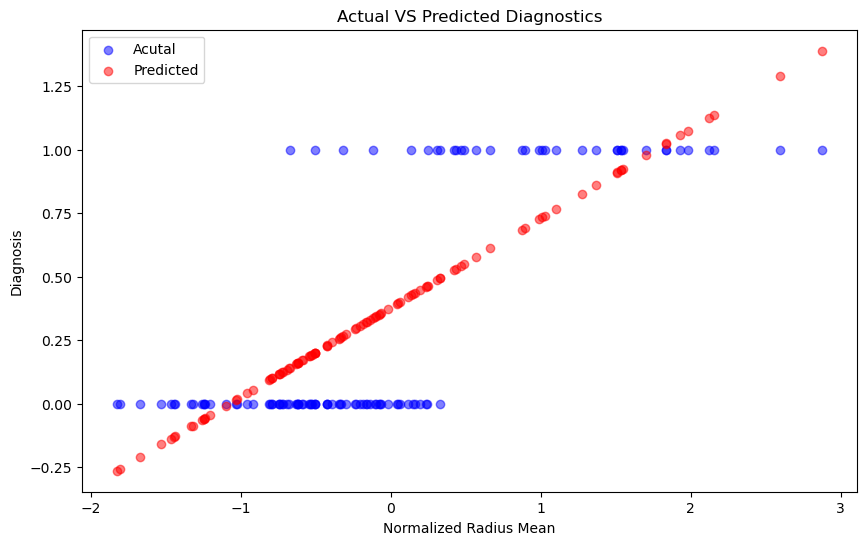

rmse: 0.30314124083531985


In [14]:
# Plot the predictions vs actual data
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 1], y_test, color = 'blue', label = 'Acutal', alpha = 0.5)
plt.scatter(x_test[:, 1], y_pred, color = 'red', label = 'Predicted', alpha = 0.5)
plt.title('Actual VS Predicted Diagnostics')
plt.xlabel('Normalized Radius Mean')
plt.ylabel('Diagnosis')
plt.legend()
plt.show()

print('rmse:', rmse_value)

Part III- Ridge Regression

In [15]:
# Set up features (X) and target (y)
X = breast_cancer_cleaned[['radius_mean']]
X = (X - X.mean()) / X.std()
#Adding an Intercept term
X = np.c_[np.ones(X.shape[0]), X]
y = breast_cancer_cleaned['diagnosis']

In [16]:
# Randomly shuffle
index = np.random.permutation(len(breast_cancer_cleaned))

# Split the indices for training (80%) and testing (20%)
train_size = int(0.8 * len(breast_cancer_cleaned))
train_i = index[:train_size]
test_i = index[train_size:]

# Create training and testing sets
x_train = X[train_i]
y_train = y[train_i]
x_test = X[test_i]
y_test = y[test_i]

print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (455, 2)
y_train: (455,)
X_test: (114, 2)
y_test: (114,)


In [17]:
#Implementation of ridge regression
def ridge_regression(X, y, l):
    X_transpose = X.T
    I_matrix = np.identity(X.shape[1])
    reg_term = l * I_matrix
    weights = np.linalg.inv(X_transpose.dot(X) + reg_term).dot(X_transpose).dot(y)
    return weights

In [18]:
l = 1.0 #lambda value
wts_ridge = ridge_regression(x_train, y_train, l)
print("Calculated Ridge Regression Weights:", wts_ridge)

Calculated Ridge Regression Weights: [0.37295394 0.35304669]


In [19]:
# Calculate the Predictions
def predict(x, weights):
    return x.dot(weights)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2).mean())

In [20]:
y_pred_ridge = predict(x_test, wts_ridge)
rmse_value_ridge = rmse(y_test, y_pred_ridge)
print('RMSE (Ridge Regression):', rmse_value_ridge)

RMSE (Ridge Regression): 0.3318708036418625


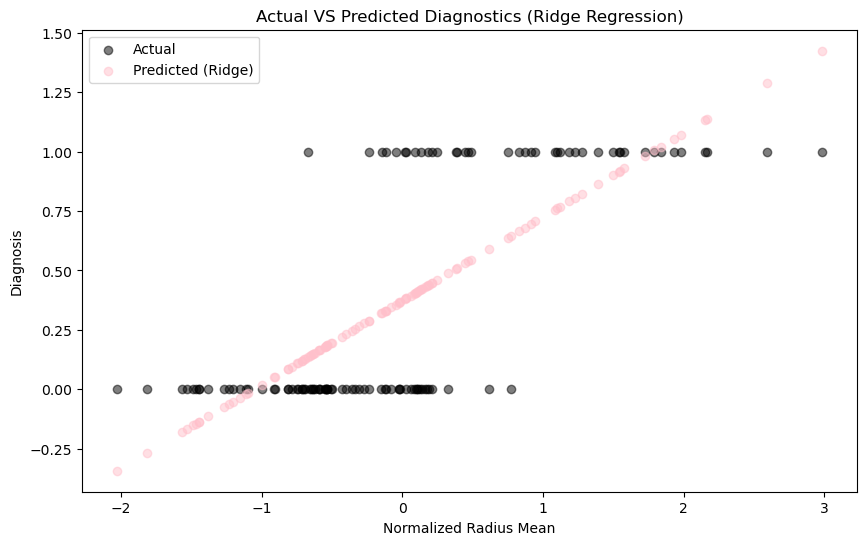

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 1], y_test, color='black', label='Actual', alpha=0.5)
plt.scatter(x_test[:, 1], y_pred_ridge, color='pink', label='Predicted (Ridge)', alpha=0.5)
plt.title('Actual VS Predicted Diagnostics (Ridge Regression)')
plt.xlabel('Normalized Radius Mean')
plt.ylabel('Diagnosis')
plt.legend()
plt.show()

**Bonus Points** : Gradient Descent from Scratch

In [22]:
def gradient_descent(X, y, l, a, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        h = np.dot(X, theta)
        # Compute gradient
        gradient = (1/m) * (X.T.dot(h - y)) + (l/m) * theta
        theta = theta - a * gradient
    return theta

In [23]:
l = 1.0
a = 0.01
iterations = 1000

In [24]:
# Train weights using Gradient Descent
wts_gd = gradient_descent(x_train, y_train, l, a, iterations)
print("Calculated Weights of Gradient Descent:", wts_gd)

Calculated Weights of Gradient Descent: [0.37293813 0.3530316 ]


In [25]:
y_pred_ridge_gd = predict(x_test, wts_gd)
rmse_gd = rmse(y_test, y_pred_ridge_gd)
print('RMSE (Gradient Descent):', rmse_gd)

RMSE (Gradient Descent): 0.33187047102820116


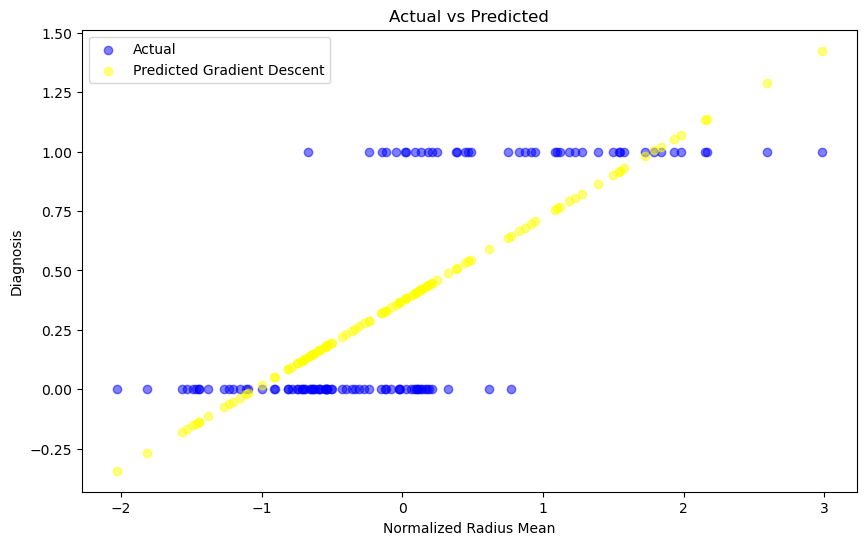

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 1], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(x_test[:, 1], y_pred_ridge_gd, color='yellow', label='Predicted Gradient Descent', alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Normalized Radius Mean')
plt.ylabel('Diagnosis')
plt.legend()
plt.show()